# Imports Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("anemia.csv")

In [65]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [10]:
data.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


# Analysis

In [13]:
data.isnull().sum()

Gender        0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
Result        0
dtype: int64

In [9]:
new_data = data.drop(["Result","Gender"],axis = 1)
new_data.head()

,Hemoglobin,MCH,MCHC,MCV
0,14.9,22.7,29.1,83.7
1,15.9,25.4,28.3,72.0
2,9.0,21.5,29.6,71.2
3,14.9,16.0,31.4,87.5
4,14.7,22.0,28.2,99.5


In [12]:
new_data.describe() #description of the data in the Dataset

,Hemoglobin,MCH,MCHC,MCV
count,1421.000000,1421.000000,1421.000000,1421.000000
mean,13.412738,22.905630,30.251232,85.523786
std,1.974546,3.969375,1.400898,9.636701
min,6.600000,16.000000,27.800000,69.400000
25%,11.700000,19.400000,29.000000,77.300000
50%,13.200000,22.700000,30.400000,85.300000
75%,15.000000,26.200000,31.400000,94.200000
max,16.900000,30.000000,32.500000,101.600000


Visualize

In [27]:
import seaborn as sns

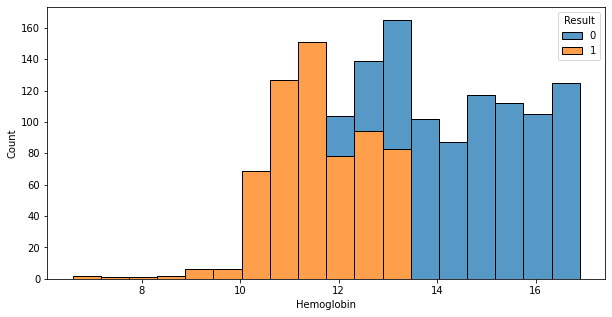

In [57]:
plt.figure(figsize=(10,5))
sns.histplot(data= data, x="Hemoglobin", hue="Result", multiple="stack")
plt.show()

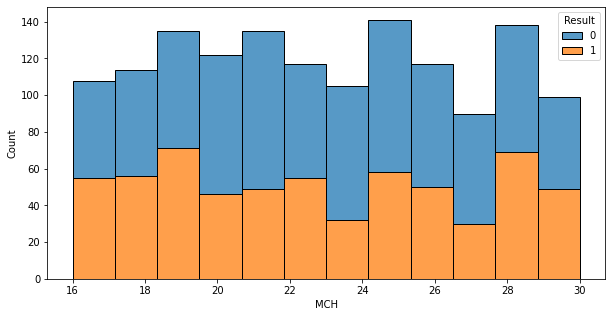

In [36]:
plt.figure(figsize=(10,5))
sns.histplot(data=data, x="MCH", hue="Result", multiple="stack")
plt.show()

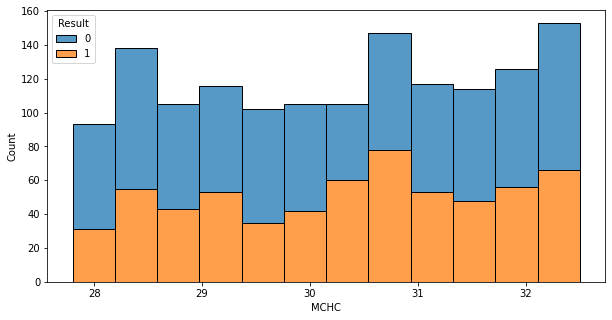

In [37]:
plt.figure(figsize=(10,5))
sns.histplot(data=data, x="MCHC", hue="Result", multiple="stack")
plt.show()

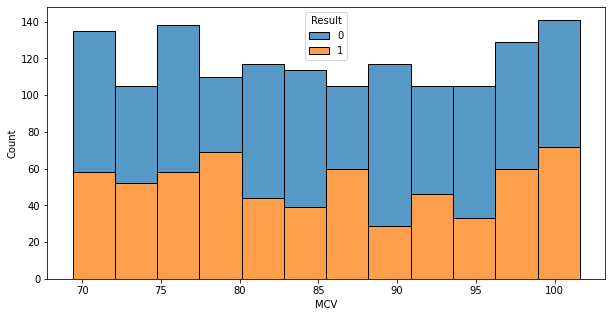

In [40]:
plt.figure(figsize=(10,5))
sns.histplot(data=data, x="MCV", hue="Result", multiple="stack")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


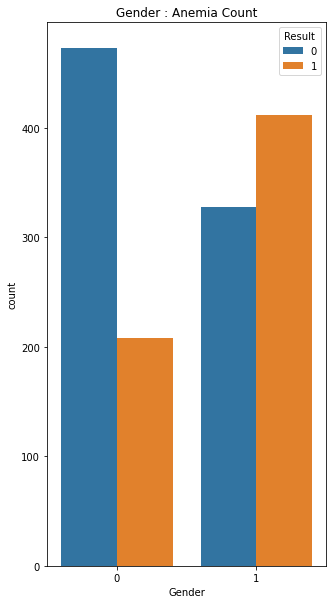

In [58]:
plt.figure(figsize=(5,10))
plot =sns.countplot('Gender',hue='Result',data = data)
plot.set_title("Gender : Anemia Count")
plt.show()

In [61]:
Dataset = data.groupby(['Gender','Result'])
Dataset.count()

Hemoglobin  MCH  MCHC  MCV
Gender Result                            
0      0              473  473   473  473
       1              208  208   208  208
1      0              328  328   328  328
       1              412  412   412  412

# Prediction with Models

In [62]:
from sklearn import model_selection

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [66]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
l = LogisticRegression()
r = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
k = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
s = SVC(kernel = 'rbf', random_state = 0)

classifier = [l,r,k,s]
for cl in classifier:
    cl.fit(X_train,y_train)

In [78]:
for cl in classifier:
    pred = cl.predict(X_test)
    print(cl," accuracy is : ",accuracy_score(y_test,pred))
    print()

LogisticRegression()  accuracy is :  0.9929824561403509

RandomForestClassifier(criterion='entropy', n_estimators=10)  accuracy is :  1.0

KNeighborsClassifier()  accuracy is :  0.968421052631579

SVC(random_state=0)  accuracy is :  0.9929824561403509



In [80]:
for cl in classifier:
    pred = cl.predict(X_test)
    print(cl,"confusion matrix-")
    print(confusion_matrix(y_test,pred))
    print()

LogisticRegression() confusion matrix-
[[168   2]
 [  0 115]]

RandomForestClassifier(criterion='entropy', n_estimators=10) confusion matrix-
[[170   0]
 [  0 115]]

KNeighborsClassifier() confusion matrix-
[[164   6]
 [  3 112]]

SVC(random_state=0) confusion matrix-
[[168   2]
 [  0 115]]



# K fold cross Validation score

In [81]:
for cl in classifier:
    accuracies = cross_val_score(estimator = cl, X = X_train, y = y_train, cv = 10)
    print(cl, " K fold cross validation score-")
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
    print()

LogisticRegression()  K fold cross validation score-
Accuracy: 98.85 %
Standard Deviation: 0.57 %

RandomForestClassifier(criterion='entropy', n_estimators=10)  K fold cross validation score-
Accuracy: 100.00 %
Standard Deviation: 0.00 %

KNeighborsClassifier()  K fold cross validation score-
Accuracy: 95.42 %
Standard Deviation: 1.48 %

SVC(random_state=0)  K fold cross validation score-
Accuracy: 99.12 %
Standard Deviation: 0.56 %



# Creating a anemia predictor

In [82]:
def anemia_predictor(Gender,Hemoglobin, MCH, MHCH,MCV ):
    a = r.predict(sc.transform([[Gender,Hemoglobin, MCH, MHCH,MCV]]))
    if a == 0:
        print("No anemia.")
    else:
        print("Anemia present.")

In [83]:
Gender = input("Gender:")
Hemoglobin = input("Hemoglobin:")
MCH = input("MCH:")
MHCH = input("MHCH:")
MCV = input("MCV:")
anemia_predictor(Gender,Hemoglobin, MCH, MHCH,MCV )

Gender:0
Hemoglobin:2
MCH:2
MHCH:2
MCV:2
Anemia present
